In [1]:
import scvi
import scanpy as sc
from sklearn.preprocessing import MinMaxScaler

# Test scANVI implementation of gaushANVI 

## Decoder: Normal distribution

In [2]:
source7 = sc.read_h5ad("/vol/data/ouologuems/data/preprocessed/source7.h5ad")
source7

AnnData object with n_obs × n_vars = 2674 × 601
    obs: 'Metadata_JCP2022', 'Metadata_InChIKey', 'Metadata_InChI', 'Metadata_Source', 'Metadata_Plate', 'Metadata_Well', 'Metadata_PlateType', 'SMILES_original', 'SMILES_standardized', 'InChI_standardized', 'InChIKey_standardized', 'broad_sample', 'InChIKey', 'pert_iname', 'pubchem_cid', 'target', 'pert_type', 'control_type', 'moa', 'well_id'
    uns: 'Metadata_Source_colors', 'neighbors', 'umap'
    obsm: 'X_umap'
    obsp: 'connectivities', 'distances'

In [3]:
scaler = MinMaxScaler()
source7.X = scaler.fit_transform(source7.X)

In [4]:
scvi.model.SCANVI.setup_anndata(source7, batch_key="Metadata_Plate", labels_key="Metadata_JCP2022", unlabeled_category="NA")

/vol/data/ouologuems/miniconda3/envs/gaushvi/lib/python3.10/abc.py:119: FutureWarning: SparseDataset is deprecated and will be removed in late 2024. It has been replaced by the public classes CSRDataset and CSCDataset.

For instance checks, use `isinstance(X, (anndata.experimental.CSRDataset, anndata.experimental.CSCDataset))` instead.

For creation, use `anndata.experimental.sparse_dataset(X)` instead.

  return _abc_instancecheck(cls, instance)
An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.
/vol/data/ouologuems/scvi-tools/scvi/data/fields/_base_field.py:64: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)


In [5]:
model = scvi.model.SCANVI(source7, gene_likelihood="normal")

In [6]:
model.train()

INFO     Training for 400 epochs.                                                                                  


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/vol/data/ouologuems/miniconda3/envs/gaushvi/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=27` in the `DataLoader` to improve performance.


Epoch 400/400: 100%|██████████| 400/400 [15:21<00:00,  2.27s/it, v_num=1, train_loss_step=-1.12e+3, train_loss_epoch=-1.13e+3]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [15:21<00:00,  2.30s/it, v_num=1, train_loss_step=-1.12e+3, train_loss_epoch=-1.13e+3]


In [7]:
SCANVI_LATENT_KEY = "X_scANVI"
source7.obsm[SCANVI_LATENT_KEY] = model.get_latent_representation()

In [8]:
sc.pp.neighbors(source7, use_rep=SCANVI_LATENT_KEY)
sc.tl.umap(source7)

/vol/data/ouologuems/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/vol/data/ouologuems/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


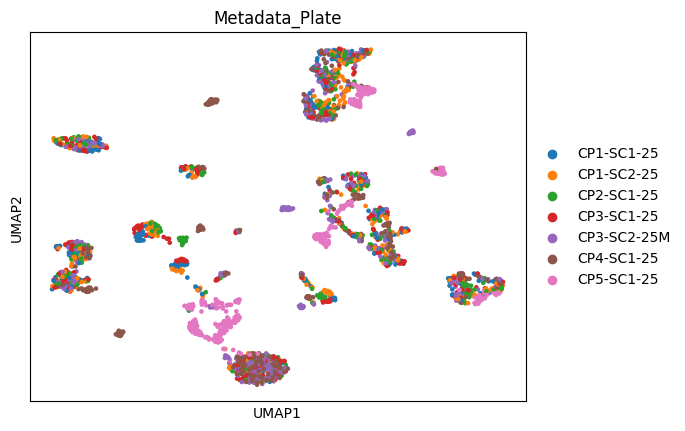

In [9]:
sc.pl.umap(source7, color="Metadata_Plate")

## Decoder: ZINB distribution

In [10]:
source7 = sc.read_h5ad("/vol/data/ouologuems/data/preprocessed/source7.h5ad")
scaler = MinMaxScaler()
source7.X = scaler.fit_transform(source7.X)
scvi.model.SCANVI.setup_anndata(source7, batch_key="Metadata_Plate", labels_key="Metadata_JCP2022", unlabeled_category="NA")
model = scvi.model.SCANVI(source7, gene_likelihood="zinb")
model.train()

INFO     Training for 400 epochs.                                                                                  


/vol/data/ouologuems/scvi-tools/scvi/data/fields/_base_field.py:64: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/vol/data/ouologuems/miniconda3/envs/gaushvi/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=27` in the `DataLoader` to improve performance.


Epoch 1/400:   0%|          | 0/400 [00:00<?, ?it/s]

/vol/data/ouologuems/scvi-tools/scvi/module/_scanvae.py:314: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)
/vol/data/ouologuems/scvi-tools/scvi/module/_scanvae.py:314: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 2/400:   0%|          | 1/400 [00:02<17:00,  2.56s/it, v_num=1, train_loss_step=1.07e+3, train_loss_epoch=1.19e+3]

/vol/data/ouologuems/scvi-tools/scvi/module/_scanvae.py:314: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 400/400: 100%|██████████| 400/400 [16:04<00:00,  2.37s/it, v_num=1, train_loss_step=430, train_loss_epoch=428]    

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [16:05<00:00,  2.41s/it, v_num=1, train_loss_step=430, train_loss_epoch=428]


/vol/data/ouologuems/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/vol/data/ouologuems/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


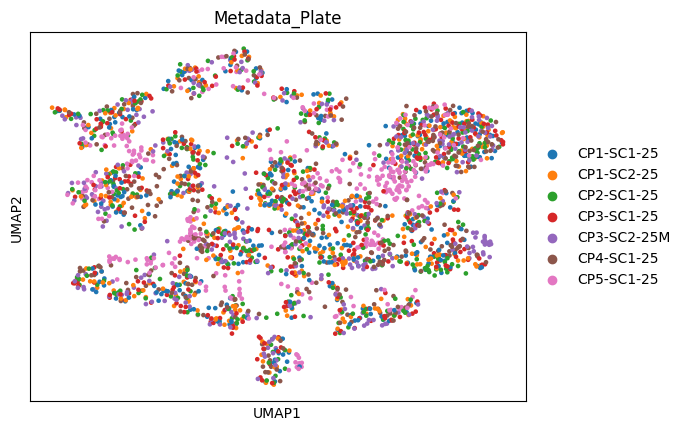

In [11]:
SCANVI_LATENT_KEY = "X_scANVI"
source7.obsm[SCANVI_LATENT_KEY] = model.get_latent_representation()
sc.pp.neighbors(source7, use_rep=SCANVI_LATENT_KEY)
sc.tl.leiden(source7)
sc.tl.umap(source7)
sc.pl.umap(source7, color="Metadata_Plate")